In [2]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:\\Users\\gines\\Downloads\\archive\\amz_uk_price_prediction_dataset.csv')
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [8]:
# Part 1: Analyzing Best-Seller Trends Across Product Categories
# 1. Crosstab analysis
import pandas as pd

data = {
    'uid': [1, 2, 3, 4, 5],
    'asin': ['B09B96TG33', 'B01HTH3C8S', 'B09B8YWXDF', 'B09B8T5VGV', 'B09WX6QD65'],
    'title': [
        'Echo Dot (5th generation, 2022 release) | Big ...',
        'Anker Soundcore mini, Super-Portable Bluetooth...',
        'Echo Dot (5th generation, 2022 release) | Big ...',
        'Echo Dot with clock (5th generation, 2022 rele...',
        'Introducing Echo Pop | Full sound compact Wi-F...'
    ],
    'stars': [4.7, 4.7, 4.7, 4.7, 4.6],
    'reviews': [15308, 98099, 15308, 7205, 1881],
    'price': [21.99, 23.99, 21.99, 31.99, 17.99],
    'isBestSeller': [False, True, False, False, False],
    'boughtInLastMonth': [0, 0, 0, 0, 0],
    'category': ['Hi-Fi Speakers', 'Hi-Fi Speakers', 'Hi-Fi Speakers', 'Hi-Fi Speakers', 'Hi-Fi Speakers']
}

df = pd.DataFrame(data)

# Crosstab analysis
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Check the columns of the crosstab to understand what labels are used
print(crosstab.columns)

# Adjust the column names in the crosstab to match your DataFrame's 'isBestSeller' column values
if True in crosstab.columns and False in crosstab.columns:
    crosstab['proportion'] = crosstab[True] / (crosstab[True] + crosstab[False])
else:
    crosstab['proportion'] = 0  # Handle case where no True or False in the crosstab

# Sort the crosstab by the proportion of best sellers
crosstab = crosstab.sort_values(by='proportion', ascending=False)

display(crosstab)


Index([False, True], dtype='bool', name='isBestSeller')


isBestSeller,False,True,proportion
category,,,
Hi-Fi Speakers,4,1,0.2


In [10]:
# 2. Statistical Tests
chi2, p, dof, expected = chi2_contingency(crosstab.iloc[:, :2])
display("Chi-square: {chi2}")
display("P-valor: {p}")

x = crosstab.sum().sum()
cramers_v = np.sqrt(chi2 / (x * (min(crosstab.shape)-1)))
display("V de Crámer: {cramers_v}")



'Chi-square: {chi2}'

'P-valor: {p}'

C:\Users\gines\AppData\Local\Temp\ipykernel_24364\1995275304.py:7: RuntimeWarning: invalid value encountered in scalar divide
  cramers_v = np.sqrt(chi2 / (x * (min(crosstab.shape)-1)))


'V de Crámer: {cramers_v}'

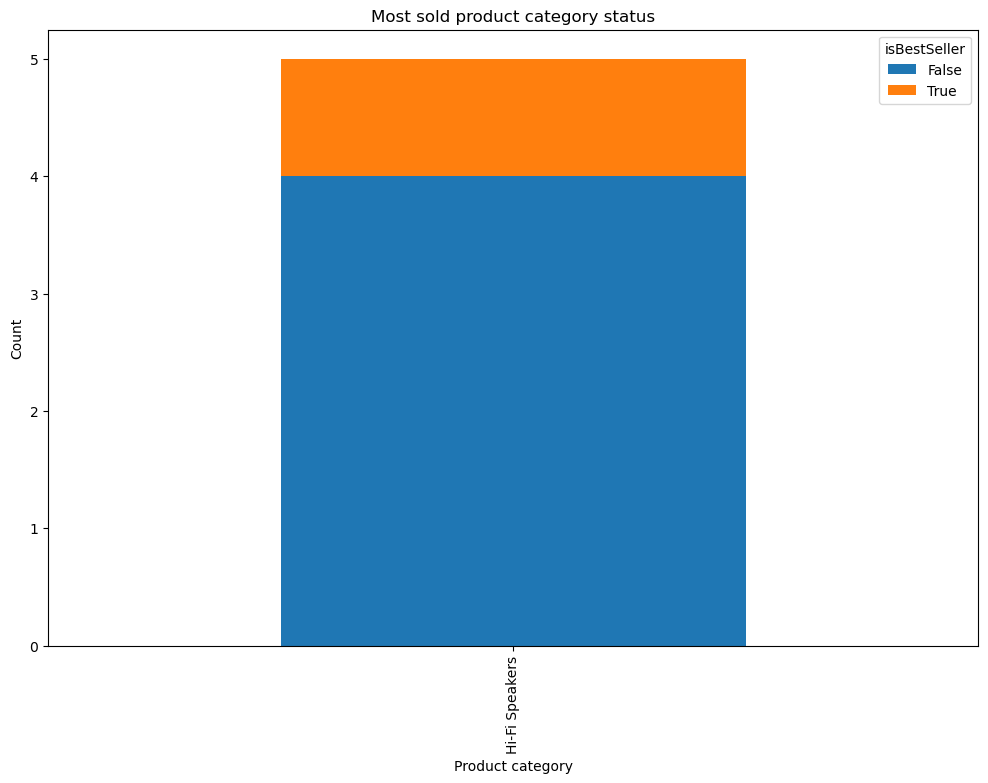

In [11]:
# 3. Visualization
crosstab.iloc[:, :2].plot(kind="bar", stacked=True, figsize=(12, 8))
plt.title('Most sold product category status')
plt.xlabel('Product category')
plt.ylabel('Count')
plt.show()

In [14]:
# Part 2: Exploring Product Prices and Ratings Across Categories and Brands
# 0. Remove outliers in product prices
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
# Define limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 - 1.5 * IQR

df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


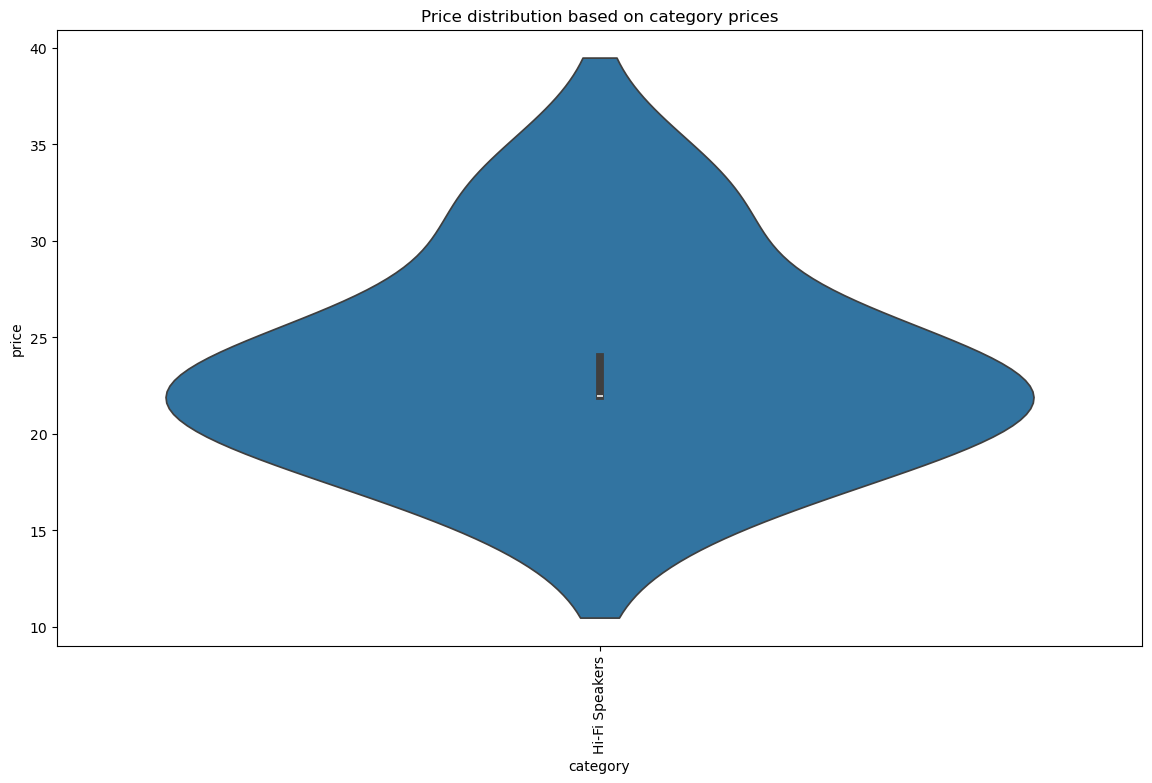

In [16]:
# 1. Violin Plots
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'uid': [1, 2, 3, 4, 5],
    'asin': ['B09B96TG33', 'B01HTH3C8S', 'B09B8YWXDF', 'B09B8T5VGV', 'B09WX6QD65'],
    'title': [
        'Echo Dot (5th generation, 2022 release) | Big ...',
        'Anker Soundcore mini, Super-Portable Bluetooth...',
        'Echo Dot (5th generation, 2022 release) | Big ...',
        'Echo Dot with clock (5th generation, 2022 rele...',
        'Introducing Echo Pop | Full sound compact Wi-F...'
    ],
    'stars': [4.7, 4.7, 4.7, 4.7, 4.6],
    'reviews': [15308, 98099, 15308, 7205, 1881],
    'price': [21.99, 23.99, 21.99, 31.99, 17.99],
    'isBestSeller': [False, True, False, False, False],
    'boughtInLastMonth': [0, 0, 0, 0, 0],
    'category': ['Hi-Fi Speakers', 'Hi-Fi Speakers', 'Hi-Fi Speakers', 'Hi-Fi Speakers', 'Hi-Fi Speakers']
}

df = pd.DataFrame(data)

# Assuming df_no_outliers is a filtered version of df without outliers
df_no_outliers = df  # replace with actual filtering logic

# 1. Violin Plots
top_20_categories = df_no_outliers['category'].value_counts().index[:20]
df_top_20_categories = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]

plt.figure(figsize=(14, 8))
sns.violinplot(x="category", y="price", data=df_top_20_categories)
plt.title("Price distribution based on category prices")
plt.xticks(rotation=90)
plt.show()

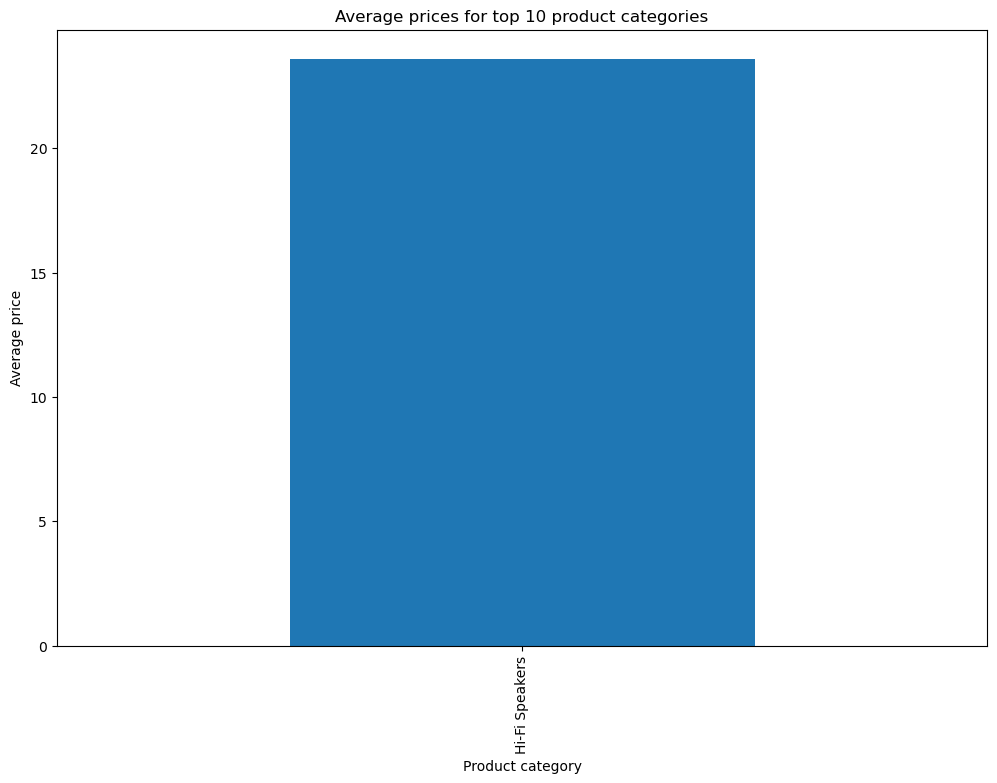

In [18]:
# 2. Bar Char
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'uid': [1, 2, 3, 4, 5],
    'asin': ['B09B96TG33', 'B01HTH3C8S', 'B09B8YWXDF', 'B09B8T5VGV', 'B09WX6QD65'],
    'title': [
        'Echo Dot (5th generation, 2022 release) | Big ...',
        'Anker Soundcore mini, Super-Portable Bluetooth...',
        'Echo Dot (5th generation, 2022 release) | Big ...',
        'Echo Dot with clock (5th generation, 2022 rele...',
        'Introducing Echo Pop | Full sound compact Wi-F...'
    ],
    'stars': [4.7, 4.7, 4.7, 4.7, 4.6],
    'reviews': [15308, 98099, 15308, 7205, 1881],
    'price': [21.99, 23.99, 21.99, 31.99, 17.99],
    'isBestSeller': [False, True, False, False, False],
    'boughtInLastMonth': [0, 0, 0, 0, 0],
    'category': ['Hi-Fi Speakers', 'Hi-Fi Speakers', 'Hi-Fi Speakers', 'Hi-Fi Speakers', 'Hi-Fi Speakers']
}

df = pd.DataFrame(data)

# Assuming df_no_outliers is a filtered version of df without outliers
df_no_outliers = df  # replace with actual filtering logic

# 2. Bar Chart
top_10_categories = df_no_outliers['category'].value_counts().index[:10]
avg_prices = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)].groupby('category')['price'].mean()

avg_prices.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8))
plt.title('Average prices for top 10 product categories')
plt.xlabel('Product category')
plt.ylabel('Average price')
plt.show()

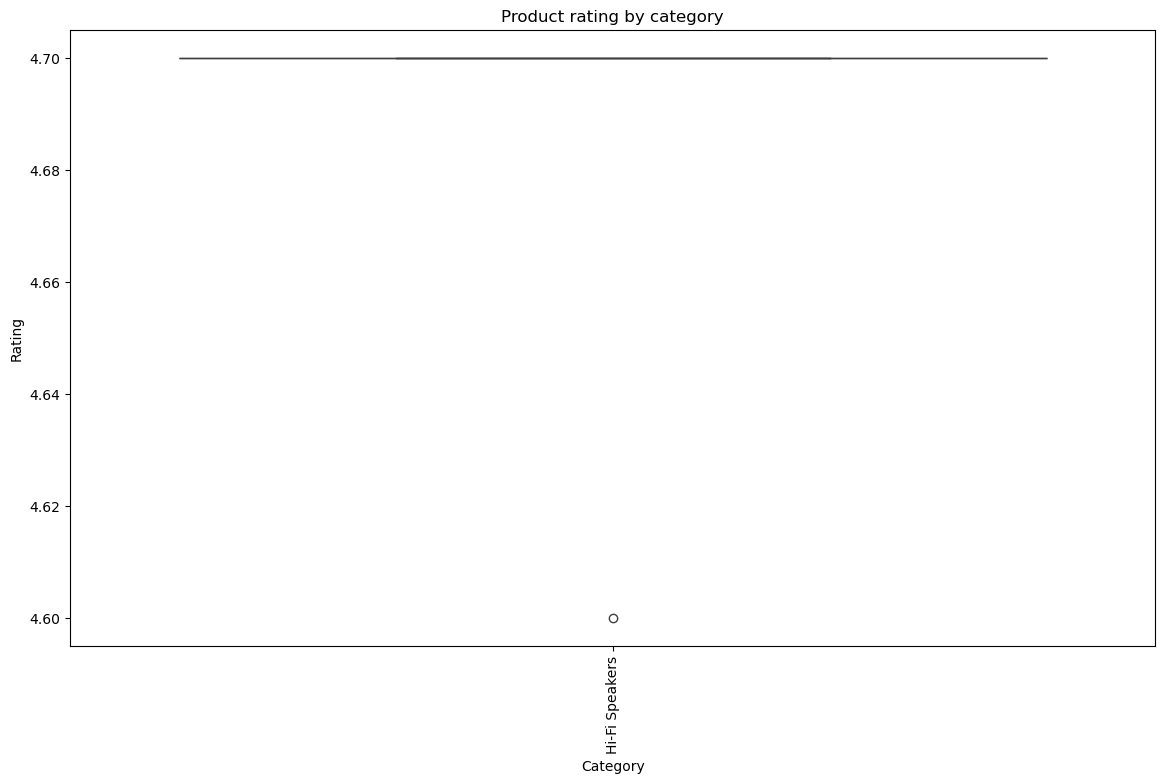

In [20]:
# 3. Box Plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = {
    'uid': [1, 2, 3, 4, 5],
    'asin': ['B09B96TG33', 'B01HTH3C8S', 'B09B8YWXDF', 'B09B8T5VGV', 'B09WX6QD65'],
    'title': [
        'Echo Dot (5th generation, 2022 release) | Big ...',
        'Anker Soundcore mini, Super-Portable Bluetooth...',
        'Echo Dot (5th generation, 2022 release) | Big ...',
        'Echo Dot with clock (5th generation, 2022 rele...',
        'Introducing Echo Pop | Full sound compact Wi-F...'
    ],
    'stars': [4.7, 4.7, 4.7, 4.7, 4.6],
    'reviews': [15308, 98099, 15308, 7205, 1881],
    'price': [21.99, 23.99, 21.99, 31.99, 17.99],
    'isBestSeller': [False, True, False, False, False],
    'boughtInLastMonth': [0, 0, 0, 0, 0],
    'category': ['Hi-Fi Speakers', 'Hi-Fi Speakers', 'Hi-Fi Speakers', 'Hi-Fi Speakers', 'Hi-Fi Speakers']
}

df = pd.DataFrame(data)

# Assuming df_no_outliers is a filtered version of df without outliers
df_no_outliers = df  # replace with actual filtering logic

# 3. Box Plot
top_10_categories = df_no_outliers['category'].value_counts().index[:10]
df_top_10_categories = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

plt.figure(figsize=(14, 8))
sns.boxplot(x="category", y="stars", data=df_top_10_categories)
plt.title("Product rating by category")
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

In [25]:
# Part 3: Investigating the Interplay Between Product Prices and Ratings
import pandas as pd

data = {
    'uid': [1, 2, 3, 4, 5],
    'asin': ['B09B96TG33', 'B01HTH3C8S', 'B09B8YWXDF', 'B09B8T5VGV', 'B09WX6QD65'],
    'title': [
        'Echo Dot (5th generation, 2022 release) | Big ...',
        'Anker Soundcore mini, Super-Portable Bluetooth...',
        'Echo Dot (5th generation, 2022 release) | Big ...',
        'Echo Dot with clock (5th generation, 2022 rele...',
        'Introducing Echo Pop | Full sound compact Wi-F...'
    ],
    'stars': [4.7, 4.7, 4.7, 4.7, 4.6],
    'reviews': [15308, 98099, 15308, 7205, 1881],
    'price': [21.99, 23.99, 21.99, 31.99, 17.99],
    'isBestSeller': [False, True, False, False, False],
    'boughtInLastMonth': [0, 0, 0, 0, 0],
    'category': ['Hi-Fi Speakers', 'Hi-Fi Speakers', 'Hi-Fi Speakers', 'Hi-Fi Speakers', 'Hi-Fi Speakers']
}

df = pd.DataFrame(data)

# Part 3: Investigating the Interplay Between Product Prices and Ratings
# 1. Correlation coefficient
correlation = df['price'].corr(df['stars'])
display(f"Correlation coefficient between price and rating: {correlation}")


'Correlation coefficient between price and rating: 0.604707897906952'

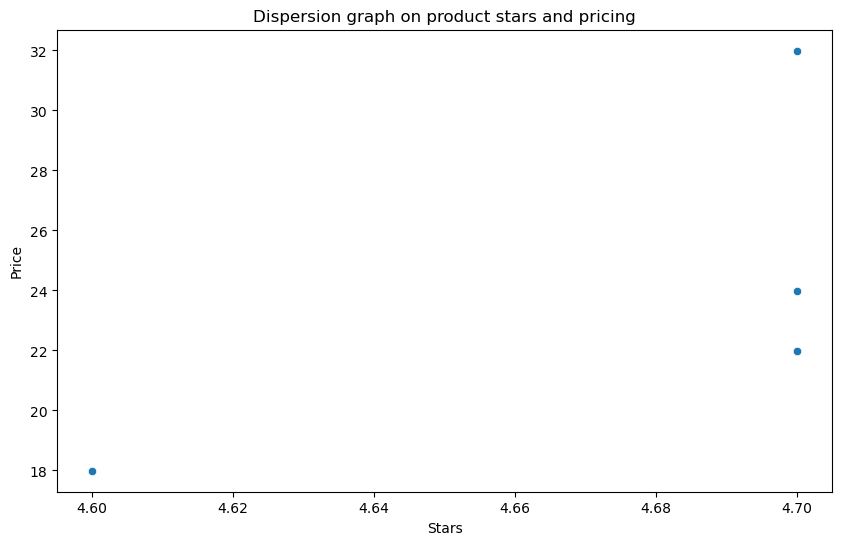

In [27]:
# 2. Visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'uid': [1, 2, 3, 4, 5],
    'asin': ['B09B96TG33', 'B01HTH3C8S', 'B09B8YWXDF', 'B09B8T5VGV', 'B09WX6QD65'],
    'title': [
        'Echo Dot (5th generation, 2022 release) | Big ...',
        'Anker Soundcore mini, Super-Portable Bluetooth...',
        'Echo Dot (5th generation, 2022 release) | Big ...',
        'Echo Dot with clock (5th generation, 2022 rele...',
        'Introducing Echo Pop | Full sound compact Wi-F...'
    ],
    'stars': [4.7, 4.7, 4.7, 4.7, 4.6],
    'reviews': [15308, 98099, 15308, 7205, 1881],
    'price': [21.99, 23.99, 21.99, 31.99, 17.99],
    'isBestSeller': [False, True, False, False, False],
    'boughtInLastMonth': [0, 0, 0, 0, 0],
    'category': ['Hi-Fi Speakers', 'Hi-Fi Speakers', 'Hi-Fi Speakers', 'Hi-Fi Speakers', 'Hi-Fi Speakers']
}

df = pd.DataFrame(data)

# 2. Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x="stars", y="price", data=df)
plt.title("Dispersion graph on product stars and pricing")
plt.xlabel('Stars')
plt.ylabel('Price')
plt.show()


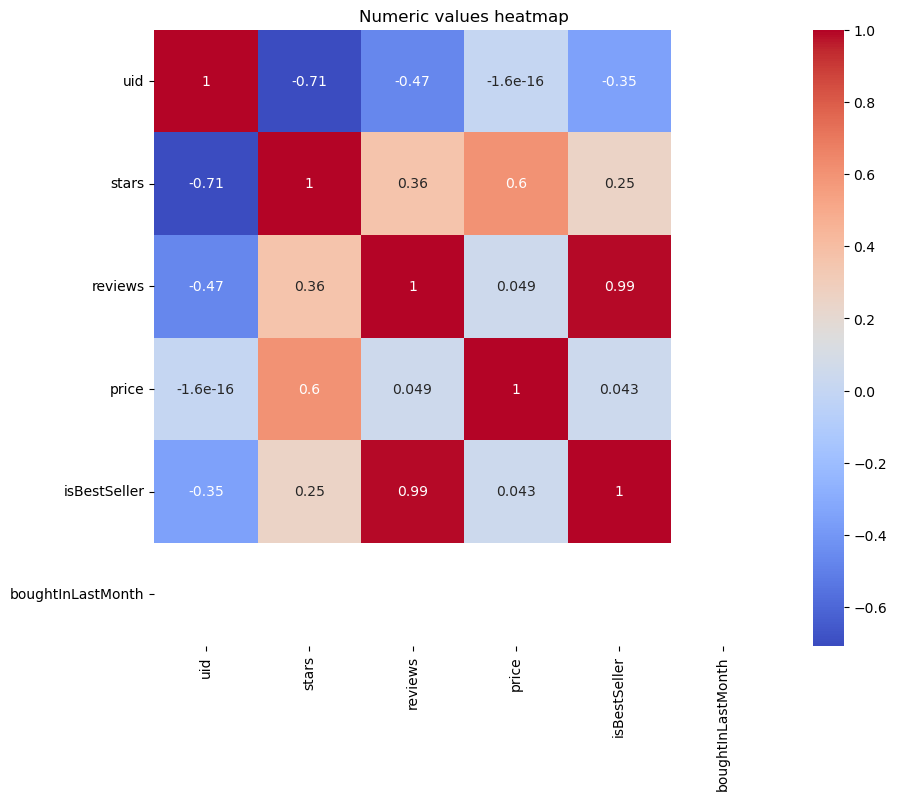

In [29]:
# 3. Correlation heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame with your actual columns
data = {
    'uid': [1, 2, 3, 4, 5],
    'asin': ['B09B96TG33', 'B01HTH3C8S', 'B09B8YWXDF', 'B09B8T5VGV', 'B09WX6QD65'],
    'title': [
        'Echo Dot (5th generation, 2022 release) | Big ...',
        'Anker Soundcore mini, Super-Portable Bluetooth...',
        'Echo Dot (5th generation, 2022 release) | Big ...',
        'Echo Dot with clock (5th generation, 2022 rele...',
        'Introducing Echo Pop | Full sound compact Wi-F...'
    ],
    'stars': [4.7, 4.7, 4.7, 4.7, 4.6],
    'reviews': [15308, 98099, 15308, 7205, 1881],
    'price': [21.99, 23.99, 21.99, 31.99, 17.99],
    'isBestSeller': [False, True, False, False, False],
    'boughtInLastMonth': [0, 0, 0, 0, 0],
    'category': ['Hi-Fi Speakers', 'Hi-Fi Speakers', 'Hi-Fi Speakers', 'Hi-Fi Speakers', 'Hi-Fi Speakers']
}

df = pd.DataFrame(data)

# 3. Correlation heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64', 'bool'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Numeric values heatmap")
plt.show()


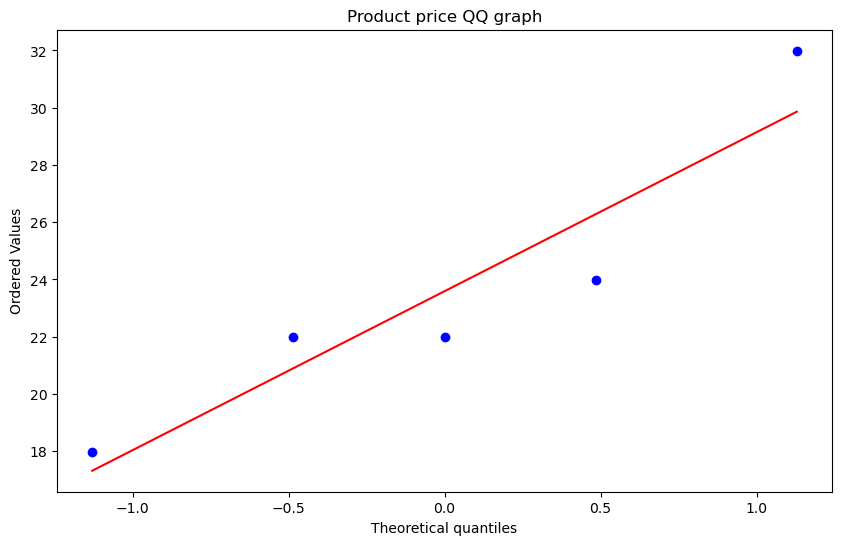

In [32]:
# 4. QQ plot
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
data = {
    'uid': [1, 2, 3, 4, 5],
    'asin': ['B09B96TG33', 'B01HTH3C8S', 'B09B8YWXDF', 'B09B8T5VGV', 'B09WX6QD65'],
    'title': [
        'Echo Dot (5th generation, 2022 release) | Big ...',
        'Anker Soundcore mini, Super-Portable Bluetooth...',
        'Echo Dot (5th generation, 2022 release) | Big ...',
        'Echo Dot with clock (5th generation, 2022 rele...',
        'Introducing Echo Pop | Full sound compact Wi-F...'
    ],
    'stars': [4.7, 4.7, 4.7, 4.7, 4.6],
    'reviews': [15308, 98099, 15308, 7205, 1881],
    'price': [21.99, 23.99, 21.99, 31.99, 17.99],
    'isBestSeller': [False, True, False, False, False],
    'boughtInLastMonth': [0, 0, 0, 0, 0],
    'category': ['Hi-Fi Speakers', 'Hi-Fi Speakers', 'Hi-Fi Speakers', 'Hi-Fi Speakers', 'Hi-Fi Speakers']
}

df = pd.DataFrame(data)

# 4. QQ plot
plt.figure(figsize=(10, 6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title("Product price QQ graph")
plt.show()
